# Figure 9 (Bottom panel)

In [1]:
import json
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
fs = 10
matplotlib.rcParams['font.size']=fs
ms = 6
matplotlib.rcParams['lines.markersize']=ms
from matplotlib import gridspec

In [2]:
def add_zoom_subplot(mydict, fit_dict, ax, ax_, xmin, xmax, doylabel = True):
    wave_tofit = np.array(mydict["wave_tofit"])
    flux_tofit = np.array(mydict["flux_tofit"])
    flux_tofit_unc = np.array(mydict["flux_tofit_unc"])
    fluxmed = np.array(mydict["flux_scale"])
    fluxmed*=1e+18
    
    flux_fitted = np.array(fit_dict["flux_fitted"])
    flux_fitted_gas = np.array(fit_dict["flux_fitted_gas"])
    stars_spectrum = flux_fitted - flux_fitted_gas
    
    resid = (flux_tofit - flux_fitted)/flux_tofit_unc
    ymin2, ymax2 = np.percentile(resid, [0.1, 99.9])
    
    uu1 = max(flux_fitted)
    bb1 = min(flux_tofit)
    ymax1 = uu1 + (uu1-bb1)*0.02
    ymin1 = 0
    
    ax.plot(wave_tofit, flux_tofit*fluxmed, 'k', linewidth = 1, alpha = 1,
            label = "data", zorder = 2)
    
    ax.plot(wave_tofit, (flux_fitted_gas+ymin1)*fluxmed, color='magenta', linewidth=0.5, alpha = 0.6,
            label = "model: gas", zorder = 3)
    ax.plot(wave_tofit, stars_spectrum*fluxmed, 'r', linewidth=1.2, alpha = 0.6,
            label = "model: stellar", zorder = 3)
    ax.plot(wave_tofit, flux_fitted*fluxmed, c='orange', linewidth=2, alpha = 0.8,
            label = "model: gas + stellar", linestyle = "-", zorder = 1)
    ax.set_ylim(ymin1*fluxmed, ymax1*fluxmed)
    ax.set_xticklabels([])
    
    ax_.plot(wave_tofit, resid, '.', color='k', ms=1)
    ax_.hlines(0, xmin, xmax, color = "r", linewidth = 1.5, alpha = 0.6,
               zorder = 5)
    ymin2 = -3
    ymax2 = 3
    ax_.set_ylim(ymin2, ymax2)
    ax_.set_xlabel("Rest-frame wavelength ("+r"$\rm \AA$"+")")
    
    if doylabel:
        ax.set_ylabel(r'$f_{\lambda}$'+" ("+r"$10^{-18}\,$"+"erg"+r"$\,{\rm s^{-1}\,cm^{-2}\,\AA^{-1}}$"+")")
        ax_.set_ylabel(r"$\frac{\rm data - model}{\rm error}$")
    else:
        ax.set_yticklabels([])
        ax_.set_yticklabels([])
        
    ax.set_xlim(xmin, xmax)
    ax_.set_xlim(xmin, xmax)
    
    ax.tick_params(which = 'major', length = 4, top=True, direction = "in", right = True)
    ax.tick_params(which = 'minor', length = 2, top=True, direction = "in", right = True)
    ax_.tick_params(which = 'major', length = 4, top=True, direction = "in", right = True)
    ax_.tick_params(which = 'minor', length = 2, top=True, direction = "in", right = True)
    ax.xaxis.set_major_locator(plt.MultipleLocator(200))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
    ax_.xaxis.set_major_locator(plt.MultipleLocator(200))
    ax_.xaxis.set_minor_locator(plt.MultipleLocator(50))
    ax.yaxis.set_major_locator(plt.MultipleLocator(2))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
    ax_.yaxis.set_major_locator(plt.MultipleLocator(2))
    ax_.yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    goodpixels = fit_dict["goodpixels"]
    w = np.flatnonzero(np.diff(goodpixels) > 1)
    for wj in w:
        a, b = goodpixels[wj : wj + 2]
        ax.axvspan(wave_tofit[a], wave_tofit[b], facecolor='lightgray',
                    zorder = 3, alpha = 0.9)
        ax_.axvspan(wave_tofit[a], wave_tofit[b], facecolor='lightgray',
                    zorder = 3, alpha = 0.9)
    if goodpixels[0]!=0:
        a = 0
        b = goodpixels[1]-1
        ax.axvspan(wave_tofit[a], wave_tofit[b], facecolor='lightgray',
                    zorder = 3, alpha = 0.9)
        ax_.axvspan(wave_tofit[a], wave_tofit[b], facecolor='lightgray',
                    zorder = 3, alpha = 0.9)
    if goodpixels[-1]!=(len(wave_tofit)-1):
        a = goodpixels[-1]+1
        b = len(wave_tofit)-1
        ax.axvspan(wave_tofit[a], wave_tofit[b], facecolor='lightgray',
                    zorder = 3, alpha = 0.9)
        ax_.axvspan(wave_tofit[a], wave_tofit[b], facecolor='lightgray',
                    zorder = 3, alpha = 0.9)


In [3]:
def paper_dictplot(mydict, fit_dict):
    xmin1 = 3650
    xmax1 = 4440
    
    xmin2 = 4720
    xmax2 = 5140
    
    xmin3 = 6220
    xmax3 = 6840
    
    xlen1 = xmax1 - xmin1
    xlen2 = xmax2 - xmin2
    xlen3 = xmax3 - xmin3
    print (xlen1, xlen2, xlen3)
    print (1, xlen2/xlen1, xlen3/xlen1)
    
    fig = plt.figure(figsize = (10, 3.5))
    gs = fig.add_gridspec(2, 3, hspace=0, wspace = 0, 
                          height_ratios=[1.8, 1],
                          width_ratios = [1, xlen2/xlen1, xlen3/xlen1])
    #axs = gs.subplots(squeeze=False)
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])
    ax3 = plt.subplot(gs[0, 2])
    
    ax1_ = plt.subplot(gs[1, 0])
    ax2_ = plt.subplot(gs[1, 1])
    ax3_ = plt.subplot(gs[1, 2])
    
    
    add_zoom_subplot(mydict, fit_dict, ax1, ax1_, xmin1, xmax1, doylabel = True)
    add_zoom_subplot(mydict, fit_dict, ax2, ax2_, xmin2, xmax2, doylabel = False)
    add_zoom_subplot(mydict, fit_dict, ax3, ax3_, xmin3, xmax3, doylabel = False)
    
    
    
    ax1.legend(borderpad=0.2, labelspacing = 0.2, handlelength = 1.5, handleheight=0.5, 
               handletextpad = 0.2, borderaxespad=0.2, columnspacing=1)
    
    plt.tight_layout(rect = (-0.01, -0.03, 1.01, 1.03))

790 420 620
1 0.5316455696202531 0.7848101265822784


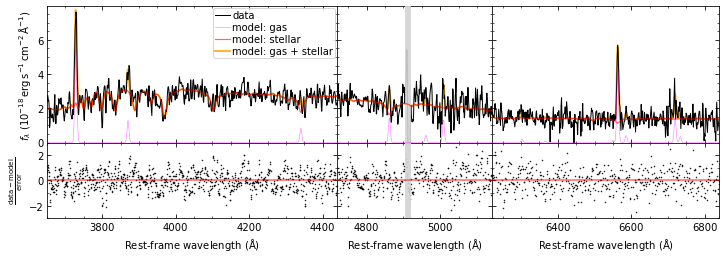

In [4]:
    template = "MILES"
    specdir = '../data/data_20mrf/host/lris/'
    
    name = "AT2020mrf"
    z_guess = 0.1352
    specfile = specdir+"goodspec.dat"
    ra2000 = 236.9758343
    dec2000 = 44.65194825
    jd = 2459318.94895
    spjsonfile = specdir+"goodspec_MILES.json"
    fitjsonfile = specdir + "goodspec_MILES_ppxfit.json"
    
    with open(spjsonfile, 'r') as fp:
        mydict = json.load(fp)
        
    with open(fitjsonfile, 'r') as fp:
        fit_dict = json.load(fp)
        
    paper_dictplot(mydict, fit_dict)